In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [36]:
training_set = pd.read_csv("../input/train.csv")
training_set.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,24,0,0,5,247.30,2,0,4,17,1050,2,1,65.32,29,28,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,1,440875,1,1,0,37.65,1,1,0,45,1072,1,1,13.55,26,23,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,2,878242,2,0,1,93.73,1,0,2,54,1404,0,0,0.00,28,28,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,3,1319841,3,0,0,95.88,0,0,0,86,1069,0,0,0.00,97,94,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,4,1757883,4,0,1,0.00,0,0,1,58,1034,0,0,0.00,47,41,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217


In [37]:
x = training_set.drop(['winPlacePerc'], axis = 1).values
x

array([[0.000000e+00, 2.400000e+01, 0.000000e+00, ..., 7.824000e+02,
        4.000000e+00, 1.458000e+03],
       [1.000000e+00, 4.408750e+05, 1.000000e+00, ..., 1.196000e+02,
        3.000000e+00, 1.511000e+03],
       [2.000000e+00, 8.782420e+05, 2.000000e+00, ..., 3.248000e+03,
        5.000000e+00, 1.583000e+03],
       ...,
       [6.224520e+06, 1.657176e+06, 4.767900e+04, ..., 4.006000e+02,
        2.000000e+00, 1.500000e+03],
       [6.224521e+06, 1.658403e+06, 4.770700e+04, ..., 6.882000e+01,
        1.000000e+00, 1.502000e+03],
       [6.224522e+06, 1.658560e+06, 4.771000e+04, ..., 2.079000e+03,
        4.000000e+00, 1.517000e+03]])

In [38]:
y = training_set['winPlacePerc'].values
y

array([0.8571, 0.04  , 0.7407, ..., 0.4483, 0.1429, 0.8077])

In [67]:
test_set = pd.read_csv("../input/test.csv")
test_set.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,47734,1659463,47734,0,0,100.0,1,0,0,59,1000,0,0,0.000,50,45,0,0.0,0,0.0,1,0,421.50,7,1500
1,47735,1659508,47735,0,1,400.0,2,0,3,9,1200,4,2,15.420,48,47,1,0.0,0,0.0,0,0,655.80,4,1526
2,47736,1659555,47736,0,0,0.0,0,0,0,72,1216,0,0,0.000,29,28,0,0.0,0,0.0,0,0,74.58,1,1475
3,47737,1659621,47737,0,0,68.6,0,0,0,68,1177,0,0,0.000,97,92,0,0.0,0,0.0,0,0,167.20,2,1464
4,47738,1659675,47738,0,1,370.5,3,0,1,45,1013,1,1,5.968,27,26,0,0.0,0,0.0,0,0,146.70,3,1505


In [39]:
test_set.shape

(1867913, 25)

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc1 = StandardScaler()
x_train = sc1.fit_transform(x_train)
x_train

array([[-1.59206388,  0.1791121 ,  0.89178108, ..., -0.69997381,
        -1.02321501, -0.57575908],
       [ 0.23472848, -0.88106655, -0.32964121, ..., -0.35322705,
         0.22602889, -0.01159201],
       [ 0.720134  , -0.2228076 ,  0.42969385, ...,  1.21801679,
         0.64244352,  1.0227143 ],
       ...,
       [-0.91792606, -0.49911511,  0.11053515, ..., -0.90479714,
        -1.02321501, -0.01159201],
       [-1.38065526,  2.22213369, -1.21775706, ..., -0.8337996 ,
        -1.02321501, -0.03509897],
       [ 0.56311143, -1.36391471, -0.88495849, ..., -0.90642742,
        -0.60680038,  0.22347761]])

In [42]:
x_test = sc1.transform(x_test)
x_test

array([[-1.29048008e+00, -1.42709862e-02,  6.69770258e-01, ...,
         1.11231770e+00, -1.90385743e-01, -1.52633777e-01],
       [ 1.41755620e+00,  4.61856945e-01,  1.21376933e+00, ...,
        -8.96224768e-01, -1.02321501e+00, -9.51870468e-01],
       [-9.59364582e-02, -5.49241091e-01,  5.35813915e-02, ...,
        -9.45231524e-01, -1.43962964e+00, -1.84645568e+01],
       ...,
       [ 7.13644639e-01, -9.79591080e-01, -4.45507648e-01, ...,
         1.55482067e+00,  2.26028889e-01,  4.11533300e-01],
       [-1.41262365e+00, -9.76019884e-01, -4.41444705e-01, ...,
         8.37320920e-01,  6.42443521e-01, -5.52252122e-01],
       [ 6.13226115e-01,  1.82782376e-01,  8.95989130e-01, ...,
         9.36749725e-01,  6.42443521e-01, -1.15920076e-02]])

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [44]:
rgr = Sequential()

rgr.add(Dense(units = 13, kernel_initializer = 'uniform', activation = 'relu', input_dim = 25))

rgr.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

rgr.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

rgr.compile(optimizer = 'adam', loss = 'mse')

In [45]:
track = rgr.fit(x_train, y_train, batch_size = 1000, epochs = 50)

Epoch 1/50
3485868/3485868 [==============================] - 8s 2us/step - loss: 0.0150
Epoch 2/50
3485868/3485868 [==============================] - 8s 2us/step - loss: 0.0099
Epoch 3/50
3485868/3485868 [==============================] - 8s 2us/step - loss: 0.0093
Epoch 4/50
3485868/3485868 [==============================] - 8s 2us/step - loss: 0.0092
Epoch 5/50
3485868/3485868 [==============================] - 8s 2us/step - loss: 0.0091
Epoch 6/50
3485868/3485868 [==============================] - 7s 2us/step - loss: 0.0090
Epoch 7/50
3485868/3485868 [==============================] - 7s 2us/step - loss: 0.0090
Epoch 8/50
3485868/3485868 [==============================] - 9s 2us/step - loss: 0.0089
Epoch 9/50
3485868/3485868 [==============================] - 8s 2us/step - loss: 0.0089
Epoch 10/50
3485868/3485868 [==============================] - 8s 2us/step - loss: 0.0089
Epoch 11/50
3485868/3485868 [==============================] - 8s 2us/step - loss: 0.0089
Epoch 12/50
3485868

In [46]:
track.history.keys()

dict_keys(['loss'])

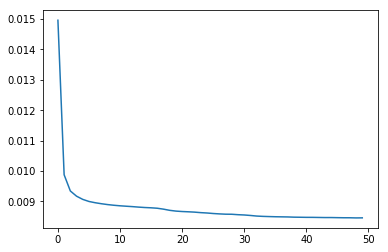

In [47]:
plt.plot(track.history['loss'])

In [49]:
y_pred = rgr.predict(x_test)

In [52]:
test = test_set.values

In [53]:
test

array([[4.773400e+04, 1.659463e+06, 4.773400e+04, ..., 4.215000e+02,
        7.000000e+00, 1.500000e+03],
       [4.773500e+04, 1.659508e+06, 4.773500e+04, ..., 6.558000e+02,
        4.000000e+00, 1.526000e+03],
       [4.773600e+04, 1.659555e+06, 4.773600e+04, ..., 7.458000e+01,
        1.000000e+00, 1.475000e+03],
       ...,
       [6.225246e+06, 2.558490e+06, 6.813800e+04, ..., 4.020000e+01,
        1.000000e+00, 1.513000e+03],
       [6.225247e+06, 2.558538e+06, 6.814000e+04, ..., 1.063000e+03,
        4.000000e+00, 1.511000e+03],
       [6.225248e+06, 2.558639e+06, 6.814300e+04, ..., 1.471000e+02,
        2.000000e+00, 1.725000e+03]])

In [54]:
test = sc1.transform(test)
test

array([[-1.69942571,  0.91194544,  1.7320848 , ..., -0.56767079,
         1.47527278, -0.01159201],
       [-1.69942516,  0.91201006,  1.73215735, ..., -0.3577954 ,
         0.22602889,  0.59958899],
       [-1.6994246 ,  0.91207755,  1.7322299 , ..., -0.87842612,
        -1.02321501, -0.59926605],
       ...,
       [ 1.73719005,  2.2028992 ,  3.21244717, ..., -0.90922217,
        -1.02321501,  0.29399849],
       [ 1.7371906 ,  2.20296813,  3.21259227, ...,  0.00695604,
         0.22602889,  0.24698457],
       [ 1.73719116,  2.20311316,  3.21280993, ..., -0.81346596,
        -0.60680038,  5.27747433]])

In [55]:
prediction = rgr.predict(test)

In [56]:
prediction

array([[0.40132204],
       [0.52077174],
       [0.2839816 ],
       ...,
       [0.03133315],
       [0.5822957 ],
       [0.2791347 ]], dtype=float32)

In [80]:
submit = pd.DataFrame()

In [82]:
submit['Id'] = test_set['Id']
submit.head()

,Id
0,47734
1,47735
2,47736
3,47737
4,47738


In [83]:
submit['winPlacePerc'] = prediction
submit.head()

,Id,winPlacePerc
0,47734,0.401322
1,47735,0.520772
2,47736,0.283982
3,47737,0.343726
4,47738,0.131823


In [ ]:
submit.to_csv('sample_submission.csv', index = False)